# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [2]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned ON


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

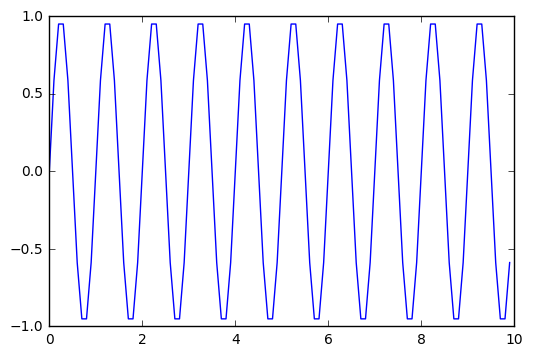

In [35]:
from numpy import arange, sin, pi
start = 0.0
N = 10
f = 1
step = 0.1
time = arange(start, N, 0.1)
plt.plot(time, sin(2*np.pi*f*time))

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

<Container object of 3 artists>

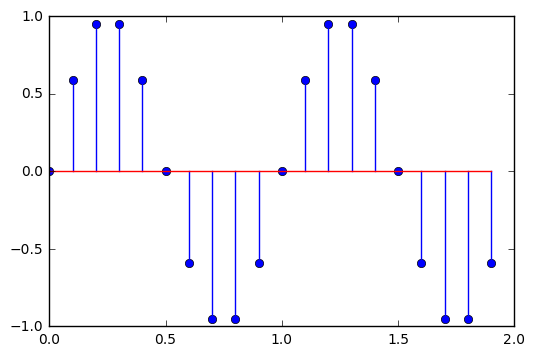

In [39]:
start = 0.0
N = 2
f = 1
fs = 10
step = 0.1
time = arange(start, N, 1/fs)
plt.stem(time, sin(2*np.pi*f*time))

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

<Container object of 3 artists>

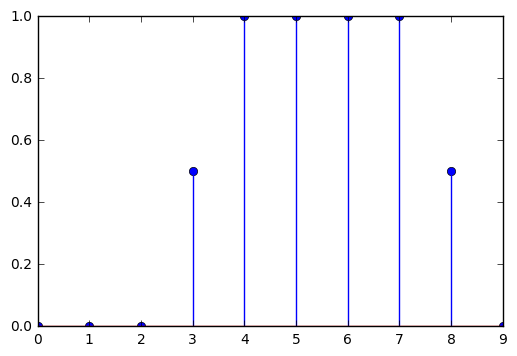

In [49]:
def step(n=0, N=20):
    myStep = np.zeros(N)
    if(n >= 0 & n < N):
        myStep[n:N-1] = 1
    
    else:
        print('ERROR : n out of range')
    
    return myStep

N = 10
y = np.zeros(N)
x_k = step(4, N)

for i in range(0, N-1):
    y[i] = (x_k[i] + x_k[i+1])/2
    
plt.stem(y)


**1.2** Propose a modification to obtain a causal version

In [ ]:
# To obtain a causal version of the signal, we should use only previous signals which means we should delay the input 
# that is not causal.
# For example we can take :
# y[k] = (x_k[i] + x_k[i-1])/2

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [57]:
def prim(f, N):
    myReturn = np.zeros(N)
    for i in range(0, N):
        for j in range(0, i):
            myReturn[i] = myReturn[i] + f[j]

    return myReturn


[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  2.  3.  4.  5.]


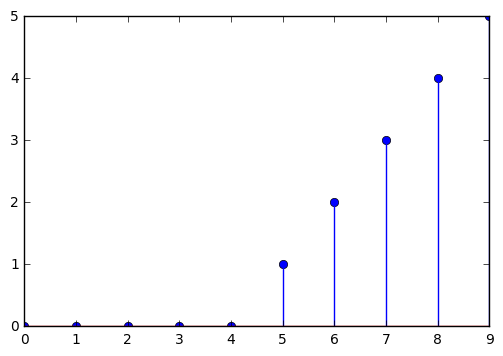

In [83]:
f = step(4, 10)
myList = prim(f, 10)
plt.stem(myList)
print(f)
print(myList)

# The primitive operator applied to the signal H(k - 4) shows that we are accumulating the previous inputs of the 
# signal H(k - 4) and for this exact signal, the primitive operator is unstable because as we go further in our steps
# it get's bigger so it's unbounded for this exact signal.

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

<Container object of 3 artists>

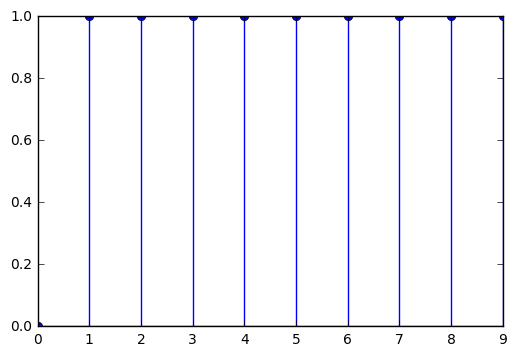

In [70]:
def dirac(n=0, N=20):
    if(n >= 0 & n < N):
       myDirac = np.zeros(N)
       myDirac[n] = 1 
    else :
        print('ERROR : n out of range')
    return myDirac

N = 10
g = dirac(0, 20)

impResponse = prim(g, 10)
plt.stem(impResponse)

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

<Container object of 3 artists>

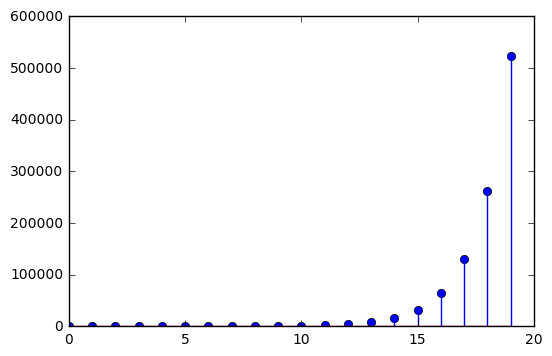

In [73]:
signal = dirac(0, 20)
N = 20
y = np.zeros(N)
y [0] = signal[0]
for i in range(1, N):
    y[i] = signal[i] + 2*y[i-1]

plt.stem(y)


**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

<Container object of 3 artists>

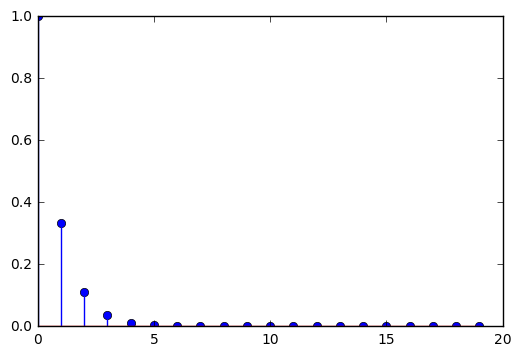

In [74]:
signal2 = dirac(0, 20)
N = 20
y = np.zeros(N)
y [0] = signal2[0]
for i in range(1, N):
    y[i] = signal2[i] + y[i-1]/3

plt.stem(y)


Comments and observations :

We can clearly see that the first system is unstable and the second one is stable by comparing the impulse responses, because when the system is stable then the impulse response goes to zero, if it's unstable on the other hand
then the impulse response will diverge to a high value which is different then zero.

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


<Container object of 3 artists>

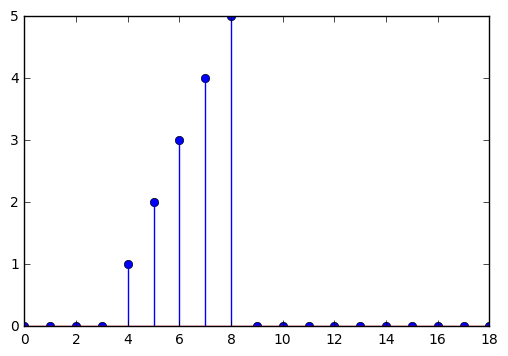

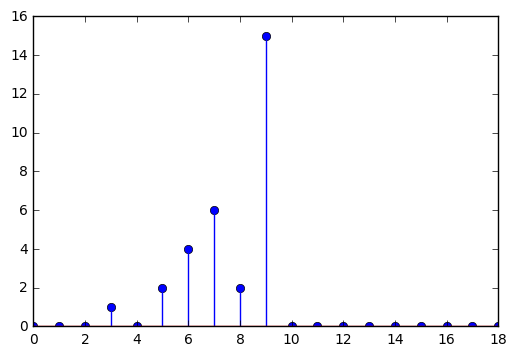

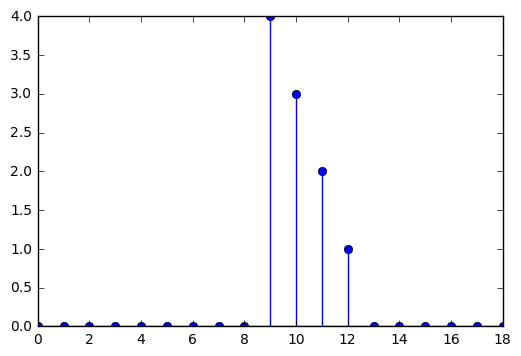

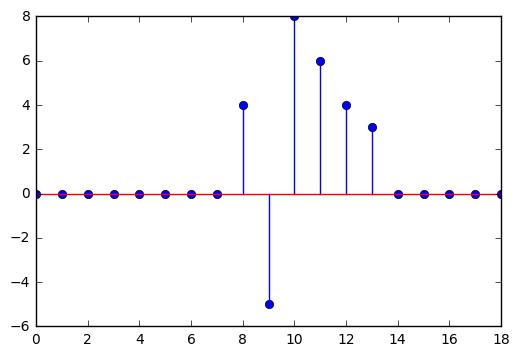

In [99]:
xa = np.zeros(19)
xa[4] = 1
xa[5] = 2
xa[6] = 3
xa[7] = 4
xa[8] = 5

xb = np.zeros(19)
xb[9] = 4
xb[10] = 3
xb[11] = 2
xb[12] = 1

ya = np.zeros(19)
yb = np.zeros(19)

for i in range(1, 18):
    ya[i] = 3*xa[i-1] - 2*xa[i] + xa[i+1] 
    yb[i] = 3*xb[i-1] - 2*xb[i] + xb[i+1] 

plt.figure()
plt.stem(xa)    
plt.figure()
plt.stem(ya)
plt.figure()
plt.stem(xb)
plt.figure()
plt.stem(yb)

**3.2** Prove the system defined by the previous equation is linear (and invariant). 

<Container object of 3 artists>

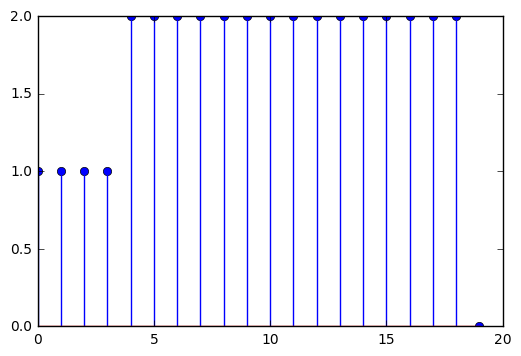

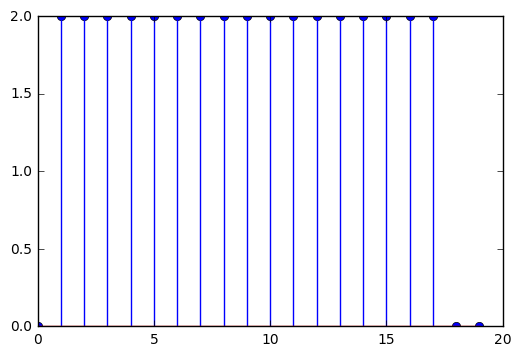

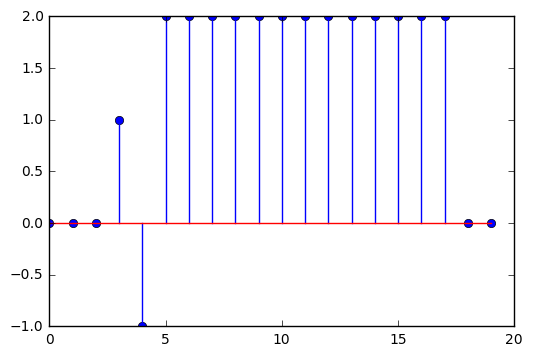

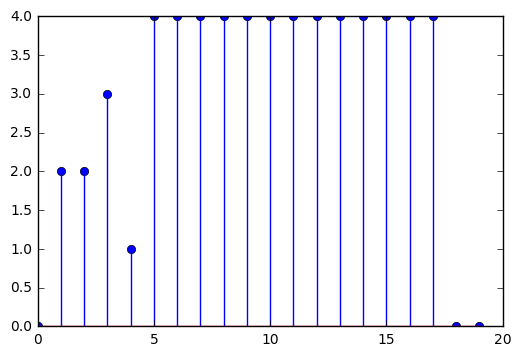

In [97]:
xa = step(0, 20)
xb = step(4, 20)


ya1 = np.zeros((20,))
yb1 = np.zeros((20,))

for i in range(1, 18):
    ya1[i] = 3*xa[i-1] - 2*xa[i] + xa[i+1] 
    

for i in range(1, 18):
    yb1[i] = 3*xb[i-1] - 2*xb[i] + xb[i+1] 
    
    
X = xa + xb
Y = ya1 + yb1

# To test invariance, we used a shifted signal, we know that if the system is invariant then we will have the same
# shift in the response of that signal otherwise it's a time variant system. ya1 is the response to the signal without 
# a shift (the original signal) and yb1 is the response to the shifted signal, we see that yb1 is shifted by the samej
# amount as shifted input signal which means that the signal is invariant.

# To test time invariant
# Please uncomment the next 4 lines

#plt.figure()
#plt.stem(ya1)
#plt.figure()
#plt.stem(yb1)

# If a system is linear then by summing two different signals, the response will be the sum of responses of those
# two signals so in our case we took to xa and xb then we ploted the sum X = xa + xb and the responses ya, yb and 
# Y = ya1 + yb1, we noticed that the response of the signal X is exactly the sum of the two responses ya1 and yb1.

# To test linearity
# The sum of the inputs
plt.figure()
plt.stem(X)

# The ouputs
plt.figure()
plt.stem(ya1)
plt.figure()
plt.stem(yb1)

# The sum of the ouputs
plt.figure()
plt.stem(Y)

**3.3** Propose a nonlinear/noninvariant system.

<Container object of 3 artists>

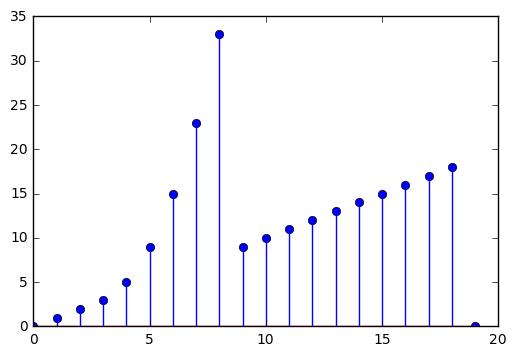

In [98]:
# Input signal
xa = np.zeros(19)
xa[4] = 1
xa[5] = 2
xa[6] = 3
xa[7] = 4
xa[8] = 5


for i in range(0, 19):
    y[i] = xa[i]*xa[i] + i
    
plt.stem(y)



In [ ]:
# This system is clearly non linear and time variant, the reasons are that :
# 1) It's non linear because we have a non linearity in its equation (the square operator).
# 2) It's time variant because it has time (the index for discrete signals) in its equation.
# We can use the same method as the last examples to prove that the system is nonlinear and time variant
# but for this case of systems it is trivial.